<a href="https://colab.research.google.com/github/YigitBCesur/Pandas-Time-Series/blob/main/Returns_by_time__Heatmap_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

[*********************100%***********************]  1 of 1 completed


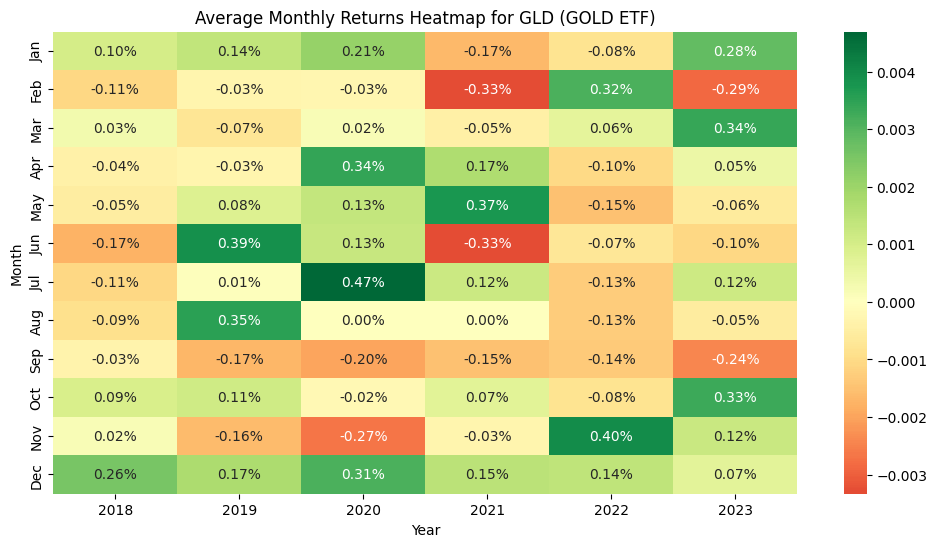

In [54]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf

# Download historical data for GLD ETF (Gold)
ticker = "GLD"
data = yf.download(ticker, start="2018-01-01", end="2023-12-31", auto_adjust=True)

# Calculate daily returns
data["Returns"] = data["Close"].pct_change()

# Drop the first row (NaN returns)
data = data.dropna()

# Extract year and month (month names)
data["Year"] = data.index.year
data["Month"] = data.index.strftime("%b")

# Calculate average monthly returns
monthly_returns = data.groupby(["Year", "Month"])["Returns"].mean().unstack()

# Ensure months are in correct order
monthly_returns = monthly_returns[["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]]

# Create heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(monthly_returns.T, annot=True, fmt=".2%", cmap="RdYlGn", cbar=True, center=0)
plt.title(f"Average Monthly Returns Heatmap for {ticker} (GOLD ETF)")
plt.show()

In [55]:
 monthly_returns

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2018,0.001005,-0.001077,0.000324,-0.000438,-0.000535,-0.001742,-0.001063,-0.000912,-0.000338,0.000937,0.000174,0.002558
2019,0.001371,-0.000304,-0.000741,-0.000307,0.000806,0.003886,0.000059,0.003509,-0.001676,0.001119,-0.001611,0.001721
2020,0.002115,-0.000269,0.000159,0.003426,0.001314,0.001266,0.004692,0.000009,-0.001991,-0.000206,-0.002690,0.003120
2021,-0.001655,-0.003333,-0.000463,0.001692,0.003726,-0.003317,0.001203,0.000007,-0.001516,0.000723,-0.000296,0.001491
2022,-0.000811,0.003155,0.000639,-0.001019,-0.001539,-0.000709,-0.001272,-0.001270,-0.001351,-0.000806,0.003954,0.001424
2023,0.002835,-0.002862,0.003393,0.000486,-0.000579,-0.001045,0.001153,-0.000548,-0.002423,0.003283,0.001214,0.000687


<ipython-input-56-32cb2f2bc084>:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data['YearMonth'] = data.index.to_period('M')


En yüksek ortalama getiri: 0.47%
Bu getiri 2020-07 ayında sağlanmış.


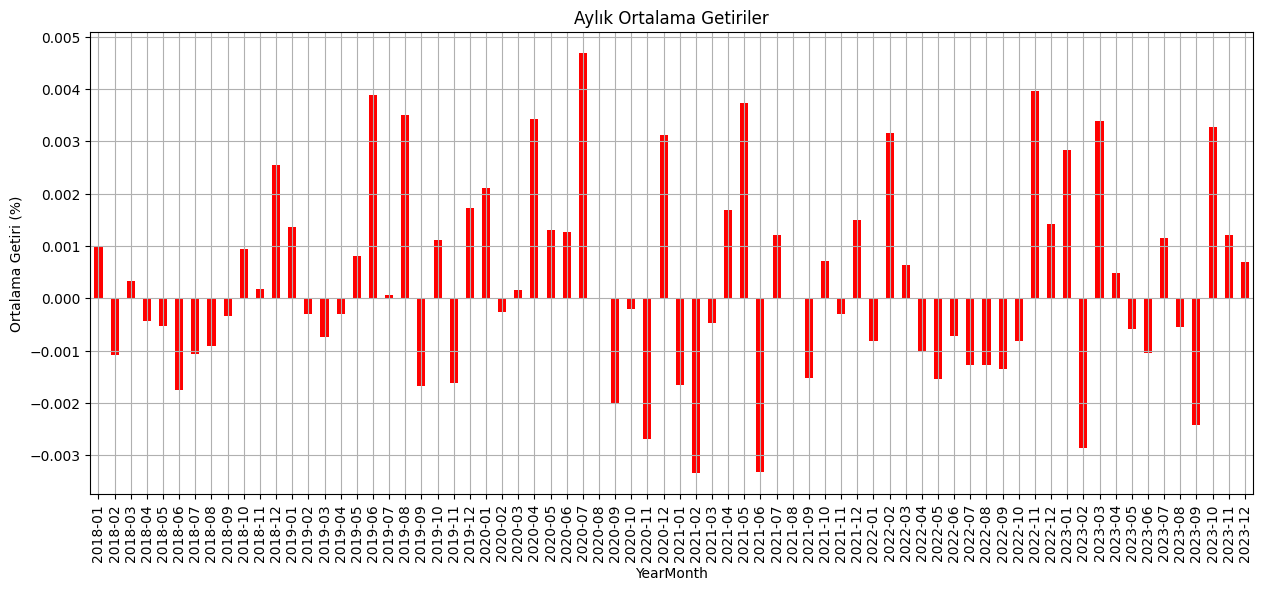

In [56]:
# Ay ve yıl bilgilerini ayıklıyoruz
data['YearMonth'] = data.index.to_period('M')

# Her ayın ortalama getirisini hesaplıyoruz
monthly_avg_return = data.groupby(data['YearMonth'])['Returns'].mean()

# En yüksek ortalama getiriye sahip ayı buluyoruz
max_month = monthly_avg_return.idxmax()
max_return = monthly_avg_return.max()

# Sonuçları yazdırıyoruz
print(f"En yüksek ortalama getiri: {max_return*100:.2f}%")
print(f"Bu getiri {max_month} ayında sağlanmış.")

# Opsiyonel: Aylar bazında getirilerin görseli
monthly_avg_return.plot(kind='bar', figsize=(15, 6), color='red', title="Aylık Ortalama Getiriler")
plt.ylabel('Ortalama Getiri (%)')
plt.grid()
plt.show()

Fakat Tum Yillarin Aylar ortalamasindan hangi ayin en yuksek , hangi hangi ayin dusuk performans gosterdigini bularak stok ayarlamalari ve personel sayisi icin onemli adim atabiliriz.

En yüksek ortalama getiri: 0.18%
Bu getiri Dec ayında sağlanmış.


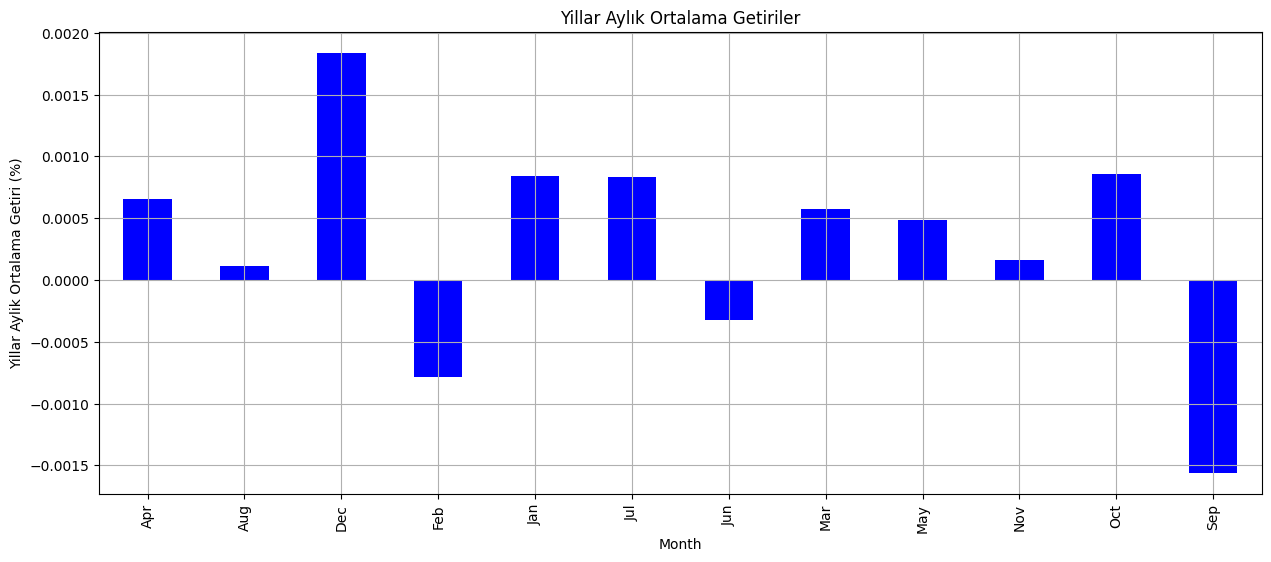

In [57]:
# Her ayın ortalama getirisini hesaplıyoruz
monthly_avg_return_for_allyears = data.groupby(data['Month'])['Returns'].mean()

# En yüksek ortalama getiriye sahip ayı buluyoruz
max_month = monthly_avg_return_for_allyears.idxmax()
max_return = monthly_avg_return_for_allyears.max()

# Sonuçları yazdırıyoruz
print(f"En yüksek ortalama getiri: {max_return*100:.2f}%")
print(f"Bu getiri {max_month} ayında sağlanmış.")

# Opsiyonel: Aylar bazında getirilerin görseli
monthly_avg_return_for_allyears.plot(kind='bar', figsize=(15, 6), color='blue', title="Yillar Aylık Ortalama Getiriler")
plt.ylabel('Yillar Aylik Ortalama Getiri (%)')
plt.grid()
plt.show()